# Installeren van Labcontrol

Welkom op deze installatie Jupyter Notebook pagina. Als deze pagina op de juiste manier geopend is, betekent dat WinPython op de computer staat. Dat is de eerste voorwaarde voor het kunnen uitvoeren van Labcontrol. De tweede voorwaarde bestaat uit de installatie van een VISA omgeving, Labcontrol besturingsscript en een verzameling Python bibliotheken. Deze Jupyter Notebook pagina zorgt voor de installatie daarvan.

# Hoe moet je deze pagina gebruiken?
Een Jupyter Notebook lijkt op een MS Word pagina waarin een krachtige programmeerbare rekenmachine, een kernell, draait.  Jupyter Notebooks pagina's bestaan uit tekstblokken voor eventuele uitleg en codeblokken die door de kernell kunnen worden uitgevoerd. Om een blok door de kernell uit te laten voren, moet je op het afspeelknopje bovenin het beeld klikken, zie onderstaande afbeelding:
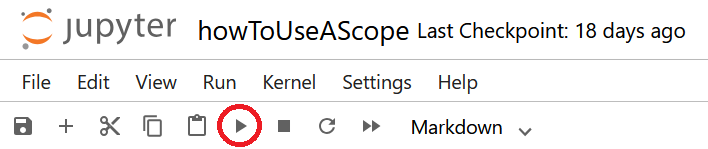

Druk je op deze knop, dan gaat de kernell direct het (blauw) omkaderde blok uitvoeren. Zoals je kunt is zien, is het blok dat je nu leest,  blauw omkaderd. Als je dit blok laat uitvoeren, gebeurt er niks, behalve dan dat de focus doorschuift naar  het volgende blok. Notebooks laten duidelijk zien of een codeblok wel of niet wordt uitgevoerd. Zolang een blok in uitvoering is, staat er een sterretje tussen de twee haakjes voor het blok, zoals te zien is in onderstaande afbeelding:
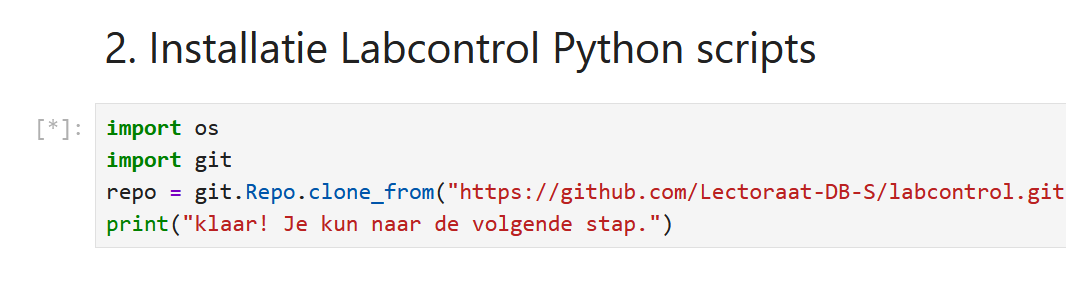

Een blok dat is uitgevoerd, is herkenbaar aan een (volg)nummer, zoals hieronder staat weergegeven:
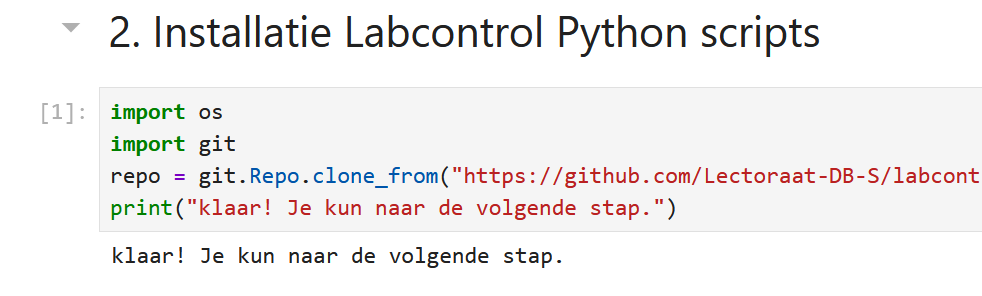


Het is belangrijk om alle blokken, achter elkaar, stap voor stap uit te voeren en telkens te wachten totdat het betreffende (code)blok helemaal uitgevoerd is. Eventuele (ongewenste) fouten worden in rode letters weergegeven. Mocht dat tijdens de uitvoering van deze pagina het geval zijn: maak een screenshot en stuur die naar de docent!  

Druk nu op het afspeelknopje om naar het volgende blok te gaan. Druk dan opnieuw op het afspeelknopje om het volgende blok, een codeblok, uit te voeren.

## 1a. Upgrade pip

In [ ]:
%pip install --upgrade pip

## 1b. Restart kernel na update

In [ ]:
import os
os._exit(00)

## 1c. Wacht op de melding dat de kernel opnieuw gestart is.
Als de kernel opnieuw opgestart is, wordt dat via een popup gemeld. Druk op OK.

## 2. Installatie Labcontrol Python scripts

In [ ]:
import os
import git
repo = git.Repo.clone_from("https://github.com/Lectoraat-DB-S/labcontrol.git",'C:\\WPy64-313110\\notebooks\labcontrol')
print("klaar! Je kun naar de volgende stap.")

## 3a. Installeren van 7-zip extractie in Python

In [ ]:
%pip install py7zr
print("Volgende stap!")

## 3b. Kernel opnieuw opstarten
Zoals de ouput van vorige codeblok mogelijk al aangeeft. Na installeren van een pakket moet de kernel opnieuw opgestart worden. Dat doet volgend codeblok:

In [ ]:
import os
os._exit(00)

## 3c Wacht totdat kernel opnieuw gestart is.
Als de kernel opnieuw opgestart is, wordt dat via een popup gemeld. Druk op OK.

## 4. Uitpakken RS VISA installer

In [ ]:
import py7zr
import os

currPath=os.getcwd()
labcontrol_path= os.path.join(currPath, "labcontrol")
RSVISA_path = os.path.join(labcontrol_path, "firmware\RhodeSchwartz\RS_VISA_Setup_Win_7_2_5.7z")

with py7zr.SevenZipFile(RSVISA_path, 'r') as archive:
    archive.extractall()
os.chdir(currPath)
print("RS VISA installer uitgepakt. Volgende stap!")

## 5. Starten RS VISA installer

Onderstaande commando start de RS VISA installer op. Tijdens de uitvoering wordt je gevraagd om toestemming te geven.


In [ ]:
!start "" /wait "RS_VISA_Setup_Win_7_2_5.exe"
print("Volgende stap!")

## 6a. Installeren ondersteunende Python bibliotheken

In [ ]:
%pip install -r https://raw.githubusercontent.com/Lectoraat-DB-S/labcontrol/main/src/requirements.txt

## 6b. Kernel restarten na installatie
Na een wijziging aan de Python omgeving, moet de kernel herstart worden. Dat doet volgend codeblok:

In [ ]:
import os
os._exit(00)

## 6c Wacht totdat kernel opnieuw gestart is.
Als de kernel opnieuw opgestart is, wordt dat via een popup gemeld. Druk op OK.

## 7. Verplaats de Labcontrol bestanden, voor makkelijker gebruik.

In [ ]:
import os
import shutil

def moveFilesFromADir(my_source_folder, my_destination_folder):
    for file_name in os.listdir(my_source_folder):
        print(file_name)
        # construct full file path
        source = os.path.join(my_source_folder, file_name)
        destination = os.path.join(my_destination_folder, file_name)
        if( not os.path.isdir(my_destination_folder)):
            print("aanmaken directory: "+my_destination_folder)
            os.mkdir(my_destination_folder)
            shutil.move(source, destination)
        else:
            shutil.move(source, destination)      
        

currPath=os.getcwd()
parentPath = os.getcwd()
old_notebook_path= os.path.join(currPath, "labcontrol/src/notebooks")
source_folder = old_notebook_path
destination_folder = parentPath
print("begin met verplaatsen")
print(destination_folder)
print(source_folder)
moveFilesFromADir(source_folder, destination_folder)

source_folder =  os.path.join(currPath, "labcontrol/src/devices")
destination_folder =  os.path.join(currPath, "devices")
print(destination_folder)
print(source_folder)
moveFilesFromADir(source_folder, destination_folder)

De installatie van Labcontrol is na uitvoering van het laatste, bovenstaande blok afgerond. Mits je tijdens de uitvoering van deze Notebook geen geen rode letters hebt gezien.
In de home directory zijn een aantal nieuwe Notebooks toegevoegd. Deze Notebooks kunnen je helpen om jouw eerste stapjes met Labcontrol te gaan maken. Veel plezier met Labcontrol!